In [1]:
# Automatically reload modules after executing each cell.
%load_ext autoreload
%autoreload 2

In [2]:
# General imports
import os
import tensorflow as tf
from scipy import stats

# Utility imports
from utils.losses import *
from utils.plotting import *
from utils.training import *

np.random.seed(666) # Need to do more to ensure data is the same across runs.

In [4]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1" # pick a number < 4 on ML4HEP; < 3 on Voltan 
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)

# Scratch

# Test 0

In [ ]:
num = 0
reps = 20
N = 10**6

mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multi/scratch/set_' + str(num) + '/bce/model_{}_{}.h5'
mse_filestr = 'models/multi/scratch/set_' + str(num) + '/mse/model_{}_{}.h5'
mlc_filestr = 'models/multi/scratch/set_' + str(num) + '/mlc/model_{}_{}.h5'
sqr_filestr = 'models/multi/scratch/set_' + str(num) + '/sqr/model_{}_{}.h5'

In [ ]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

## Test 1

In [9]:
num = 1
reps = 20
N = 10**6

mu_bkgd = np.array([-0.1, 0.1])
mu_sgnl = np.array([0.1, -0.1])
sg = 2*np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg)
sgnl = stats.multivariate_normal(mu_sgnl, sg)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [10]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

0
0.19225743412971497 	 66	
0.057549938559532166 	 72	
-1.894114375114441 	 31	
0.3665555417537689 	 31	


1
0.1922660917043686 	 36	
0.057548459619283676 	 82	
-1.9855149984359741 	 26	
0.3666163682937622 	 38	


2
0.1922825574874878 	 44	
0.057546600699424744 	 87	
-1.9883630275726318 	 28	
0.366619735956192 	 40	


3
0.19230355322360992 	 49	
0.05754242464900017 	 64	
-1.8804967403411865 	 32	
0.36623287200927734 	 28	


4
0.1922404021024704 	 45	
0.057546570897102356 	 64	
-1.9716618061065674 	 29	
0.3665590286254883 	 31	


5
0.19226500391960144 	 43	
0.057549189776182175 	 61	
-1.988587498664856 	 18	
0.3663609027862549 	 30	


6
0.1922980397939682 	 54	
0.05754874646663666 	 72	
-1.9842921495437622 	 34	
0.36682823300361633 	 29	


7
0.19226300716400146 	 44	
0.057547640055418015 	 71	
-1.9688494205474854 	 35	
0.3663704991340637 	 33	


8
0.1922813504934311 	 43	
0.05754658952355385 	 90	
-1.9919438362121582 	 41	
0.36647796630859375 	 39	


9
0.19229990243911743 	 47	
0.057541

# Test 2

In [11]:
num = 2
reps = 20
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = 2*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [12]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

0
0.055461492389440536 	 100	
0.014756515622138977 	 100	
-2.5368309020996094 	 67	
nan 	 80	nan 	 85	0.13490113615989685 	 100	


1
0.055484239012002945 	 100	
0.014747466892004013 	 100	
-2.542558193206787 	 92	
0.13483577966690063 	 83	


2
0.055491454899311066 	 100	
0.014748143032193184 	 99	
-2.543400526046753 	 71	
nan 	 86	nan 	 74	0.13491396605968475 	 71	


3
0.055469390004873276 	 100	
0.014748661778867245 	 100	
-2.544820785522461 	 74	
0.1350085586309433 	 72	


4
0.05546009540557861 	 100	
0.014745209366083145 	 99	
-2.542452096939087 	 84	
0.1351493000984192 	 85	


5
0.05544314160943031 	 100	
0.014754480682313442 	 100	
-2.545665979385376 	 91	
0.13492445647716522 	 93	


6
0.055455733090639114 	 100	
0.01475228276103735 	 100	
-2.536168098449707 	 78	
nan 	 86	0.13509707152843475 	 95	


7
0.055480290204286575 	 100	
0.014750818721950054 	 100	
-2.5340404510498047 	 88	
nan 	 98	0.13493771851062775 	 90	


8
0.05549304559826851 	 100	
0.014755967073142529 	 100	
-2.54

# Test 3

In [13]:
num = 3
reps = 20
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 2]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [14]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

0
0.05639847740530968 	 80	
0.015264037996530533 	 100	
-2.7958295345306396 	 44	
0.1325935274362564 	 78	


1
0.056434765458106995 	 76	
0.01526104100048542 	 95	
-2.6830315589904785 	 40	
0.13227272033691406 	 81	


2
0.056383293122053146 	 84	
0.015274502336978912 	 100	
-2.8820013999938965 	 61	
0.13272669911384583 	 62	


3
0.0565963089466095 	 71	
0.015262175351381302 	 86	
-2.7820537090301514 	 50	
0.1327187865972519 	 49	


4
0.056422557681798935 	 71	
0.015263457782566547 	 100	
-2.8678174018859863 	 55	
0.13262443244457245 	 62	


5
0.05648989975452423 	 64	
0.015257607214152813 	 81	
-2.8640666007995605 	 57	
0.13348811864852905 	 66	


6
0.05645190179347992 	 68	
0.015265842899680138 	 100	
-2.842919111251831 	 59	
0.1333470493555069 	 53	


7
0.05649544298648834 	 58	
0.01527270209044218 	 100	
-2.848506212234497 	 56	
0.13288305699825287 	 55	


8
0.05655450373888016 	 76	
0.015271744690835476 	 76	
-2.589826822280884 	 41	
0.13274112343788147 	 62	


9
0.0564172826707363

# Test 4

In [15]:
num = 4
reps = 20
N = 10**6

mu_bkgd = np.array([-0.1, 0])
mu_sgnl = np.array([0.1, 0])
sg_bkgd = np.array([[2, 1], [1, 1]])
sg_sgnl = np.array([[2, -1], [-1, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

# Model parameters
bce_params = {'loss':bce, 'd': 2, 'verbose': 0}
mse_params = {'loss':mse, 'd': 2, 'verbose': 0}
mlc_params = {'loss':exp_mlc, 'd': 2, 'output':'linear', 'verbose': 0}
sqr_params = {'loss':exp_sqr, 'd': 2, 'output':'linear', 'verbose': 0}

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [16]:
data = make_data(bkgd, sgnl, N) + [N]

for i in range(reps):
    print(i)
    bce_model, trace = train(data, **bce_params)
    print()
    mse_model, trace = train(data, **mse_params)
    print()
    mlc_model, trace = train(data, **mlc_params)
    while np.isnan(trace.history['val_loss'][-1]):
        mlc_model, trace = train(data, **mlc_params)
    print()
    sqr_model, trace = train(data, **sqr_params)
    while np.isnan(trace.history['val_loss'][-1]):
        sqr_model, trace = train(data, **sqr_params)
    print('\n\n')
    bce_model.save_weights(bce_filestr.format(i))
    mse_model.save_weights(mse_filestr.format(i))
    mlc_model.save_weights(mlc_filestr.format(i))
    sqr_model.save_weights(sqr_filestr.format(i))

0
0.15274320542812347 	 100	
0.04708702489733696 	 100	
nan 	 65	-3.7031917572021484 	 46	
0.2812582850456238 	 64	


1
0.15270790457725525 	 78	
0.04708349332213402 	 91	
nan 	 55	nan 	 55	nan 	 61	nan 	 59	-3.644212007522583 	 62	
0.2815016806125641 	 63	


2
0.15270590782165527 	 92	
0.04708828032016754 	 94	
nan 	 53	-3.62308931350708 	 44	
0.2813784182071686 	 92	


3
0.15271452069282532 	 91	
0.047089915722608566 	 100	
-3.9170892238616943 	 50	
0.2815941274166107 	 100	


4
0.1527051031589508 	 81	
0.047078296542167664 	 100	
nan 	 59	nan 	 62	nan 	 62	-4.096400737762451 	 55	
0.2812025547027588 	 78	


5
0.1526992917060852 	 81	
0.047082506120204926 	 100	
nan 	 74	nan 	 74	-3.5595922470092773 	 45	
0.28136637806892395 	 71	


6
0.15271751582622528 	 76	
0.047086991369724274 	 98	
nan 	 61	nan 	 62	-3.3673415184020996 	 21	
0.28122398257255554 	 75	


7
0.15271249413490295 	 100	
0.047084610909223557 	 100	
-2.497926950454712 	 41	
0.2812234163284302 	 61	


8
0.152697786688804

# Performance

## Test 0

In [ ]:
num = 0
N = 10**6

mu = np.array([0.1, 0])
sg = np.eye(2)

bkgd = stats.multivariate_normal(-mu, sg)
sgnl = stats.multivariate_normal(mu, sg)

bce_filestr = 'models/multi/scratch/set_' + str(num) + '/bce/model_{}_{}.h5'
mse_filestr = 'models/multi/scratch/set_' + str(num) + '/mse/model_{}_{}.h5'
mlc_filestr = 'models/multi/scratch/set_' + str(num) + '/mlc/model_{}_{}.h5'
sqr_filestr = 'models/multi/scratch/set_' + str(num) + '/sqr/model_{}_{}.h5'

In [ ]:
lr = make_lr(bkgd, sgnl) 

In [ ]:
bce_model = create_model(**bce_params)
bce_model.load_weights(bce_filestr.format(0))
bce_lr = odds_lr(bce_model)

mse_model = create_model(**mse_params)
mse_model.load_weights(mse_filestr.format(0))
mse_lr = odds_lr(mse_model)

mlc_model = create_model(**mlc_params)
mlc_model.load_weights(mlc_filestr.format(0))
mlc_lr = exp_lr(mlc_model)

sqr_model = create_model(**sqr_params)
sqr_model.load_weights(sqr_filestr.format(0))
sqr_lr = exp_lr(sqr_model)

In [ ]:
g = np.meshgrid(np.linspace(-6, 6, 300), np.linspace(-6, 6, 300))
g = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis = 1)

In [ ]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

In [ ]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

In [ ]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

In [ ]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

## Test 1

In [74]:
# Test 1
mu_bkgd = np.array([-0.1, 0.1])
mu_sgnl = np.array([0.1, -0.1])
sg = 2*np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg)
sgnl = stats.multivariate_normal(mu_sgnl, sg)

num = 1

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

In [75]:
lr = make_lr(bkgd, sgnl) 

In [76]:
bce_model = create_model(**bce_params)
bce_model.load_weights(bce_filestr.format(0))
bce_lr = odds_lr(bce_model)

mse_model = create_model(**mse_params)
mse_model.load_weights(mse_filestr.format(0))
mse_lr = odds_lr(mse_model)

mlc_model = create_model(**mlc_params)
mlc_model.load_weights(mlc_filestr.format(0))
mlc_lr = exp_lr(mlc_model)

sqr_model = create_model(**sqr_params)
sqr_model.load_weights(sqr_filestr.format(0))
sqr_lr = exp_lr(sqr_model)

In [ ]:
g = np.meshgrid(np.linspace(-6, 6, 300), np.linspace(-6, 6, 300))
g = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis = 1)

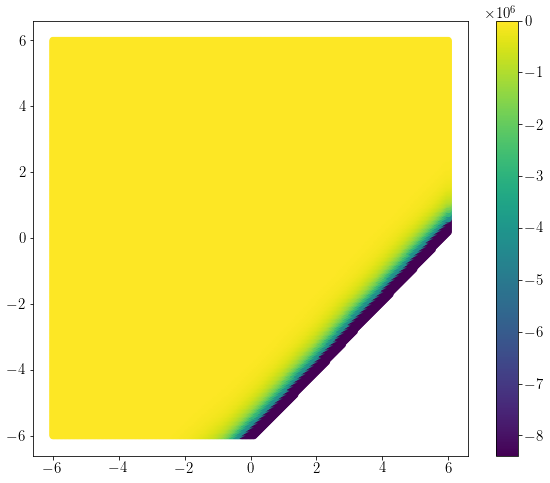

In [83]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:111: RuntimeWarning: divide by zero encountered in true_divide
  return np.squeeze(f / (1. - f))


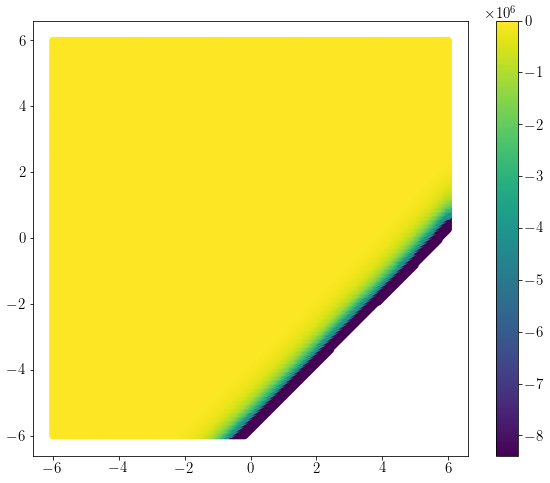

In [84]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

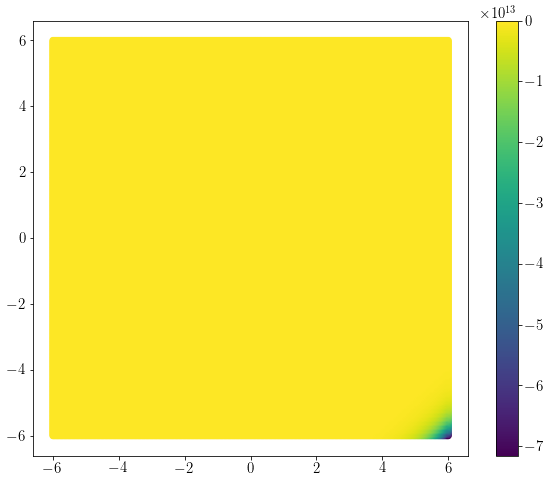

In [85]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

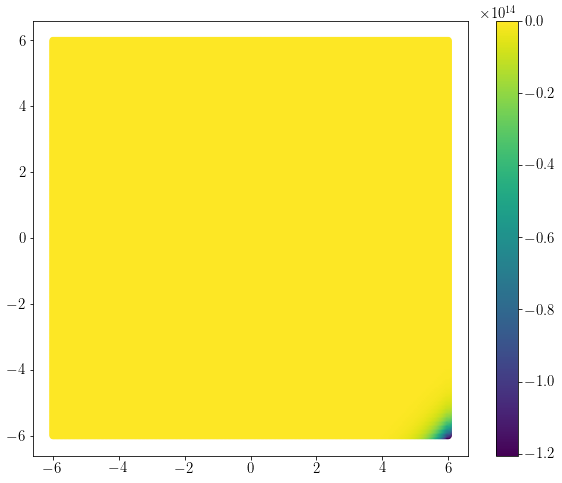

In [86]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

In [87]:
g = np.meshgrid(np.linspace(-2, 2, 300), np.linspace(-2, 2, 300))
g = np.append(g[0].reshape(-1, 1), g[1].reshape(-1, 1), axis = 1)

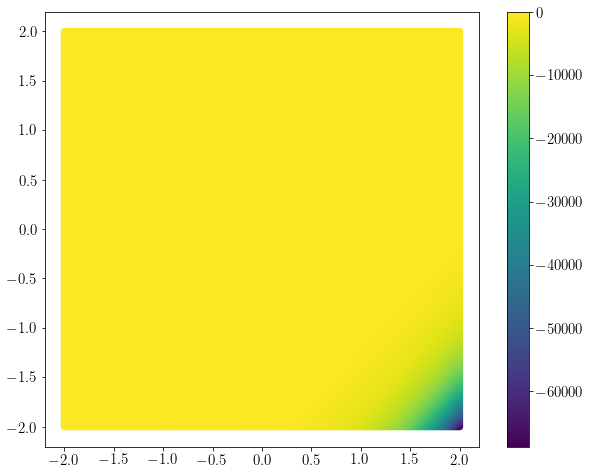

In [88]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_2.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

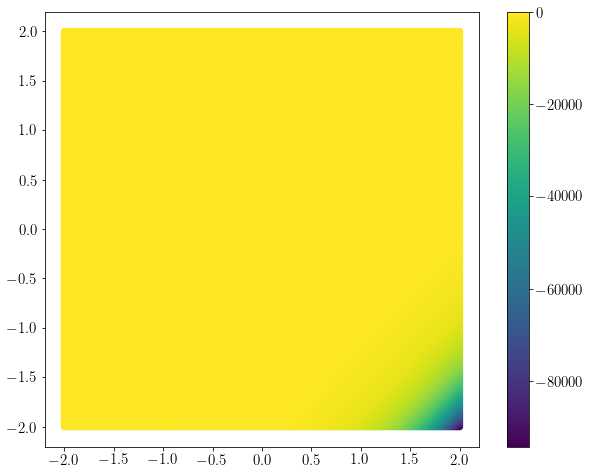

In [89]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_2.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

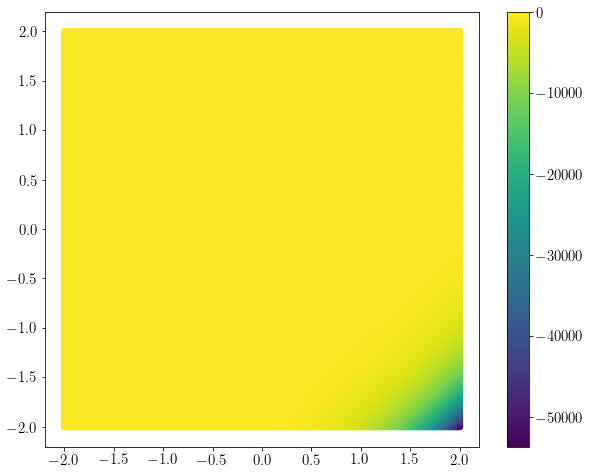

In [90]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_2.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

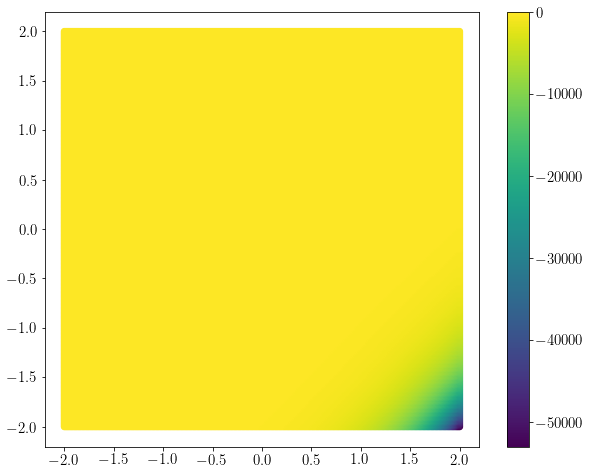

In [91]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_2.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

## Test 2

In [131]:
# Test 2
mu_bkgd = np.array([-3, 0])
mu_sgnl = np.array([3, 0])
sg_bkgd = 4*np.eye(2)
sg_sgnl = np.eye(2)

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 2

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

In [133]:
[mae(lr) for lr in bce_lrs]

[inf,
 inf,
 inf,
 inf,
 inf,
 8331.413016532859,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

In [93]:
g = np.meshgrid(np.linspace(-6, 6, 300), np.linspace(-6, 6, 300))
g = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis = 1)

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:111: RuntimeWarning: divide by zero encountered in true_divide
  return np.squeeze(f / (1. - f))


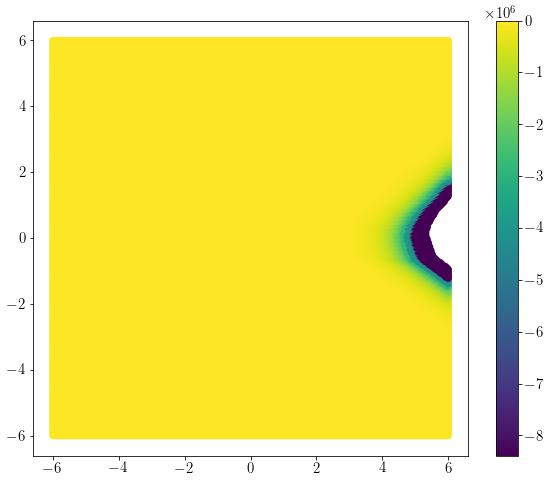

In [94]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

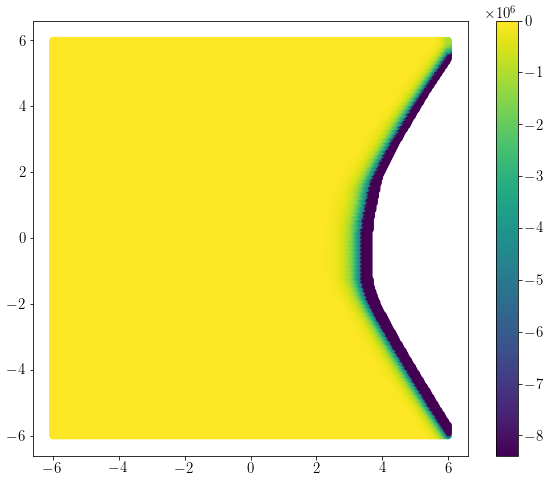

In [95]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

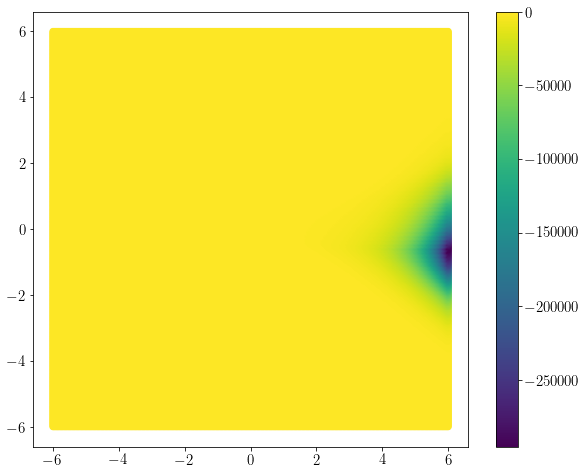

In [96]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

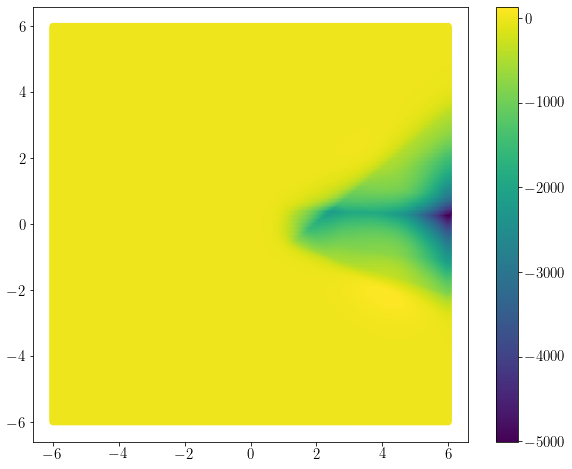

In [97]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

## Test 3

In [126]:
# Test 3
mu_bkgd = np.array([-3, 0])
mu_sgnl = np.array([3, 0])
sg_bkgd = np.array([[4, 0], [0, 1]])
sg_sgnl = np.array([[1, 0], [0, 4]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 3

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl)
mae = make_mae(bkgd, sgnl)

bce_lrs = [None] * reps
mse_lrs = [None] * reps
mlc_lrs = [None] * reps
sqr_lrs = [None] * reps

for i in range(reps):
    bce_model = create_model(**bce_params)
    bce_model.load_weights(bce_filestr.format(i))
    bce_lrs[i] = odds_lr(bce_model)

    mse_model = create_model(**mse_params)
    mse_model.load_weights(mse_filestr.format(i))
    mse_lrs[i] = odds_lr(mse_model)

    mlc_model = create_model(**mlc_params)
    mlc_model.load_weights(mlc_filestr.format(i))
    mlc_lrs[i] = exp_lr(mlc_model)

    sqr_model = create_model(**sqr_params)
    sqr_model.load_weights(sqr_filestr.format(i))
    sqr_lrs[i] = exp_lr(sqr_model)

bce_lr = bce_lrs[0]
mse_lr = mse_lrs[0]
mlc_lr = mlc_lrs[0]
sqr_lr = sqr_lrs[0]

In [130]:
[mae(lr) for lr in mse_lrs]

[inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf,
 inf]

In [99]:
g = np.meshgrid(np.linspace(-6, 6, 300), np.linspace(-6, 6, 300))
g = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis = 1)

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:111: RuntimeWarning: divide by zero encountered in true_divide
  return np.squeeze(f / (1. - f))


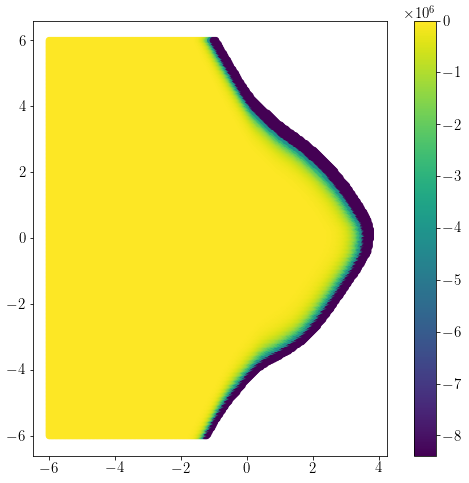

In [100]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

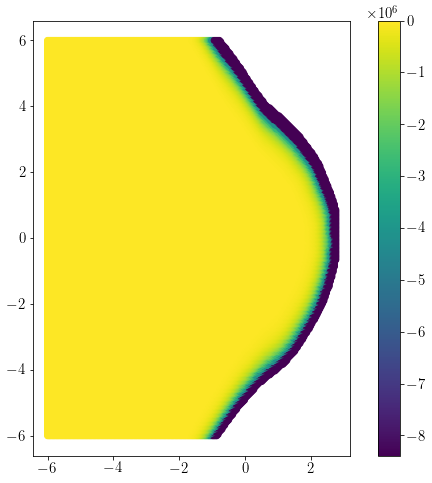

In [101]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

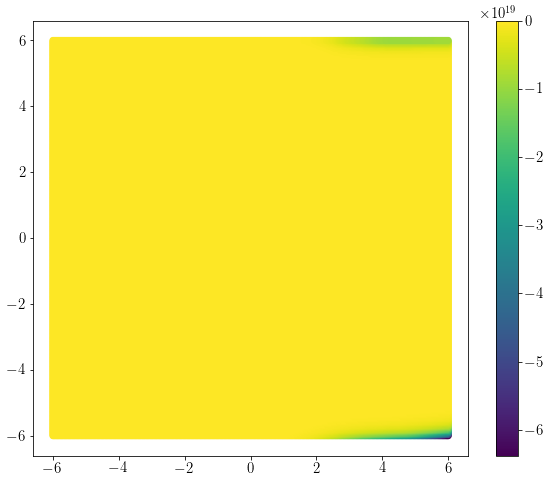

In [102]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

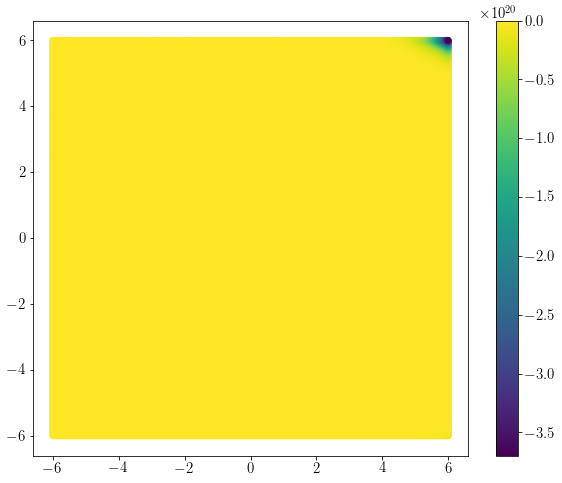

In [103]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

## Test 4

In [104]:
# Test 4

mu_bkgd = np.array([-3, 0])
mu_sgnl = np.array([3, 0])
sg_bkgd = np.array([[4, 1], [1, 1]])
sg_sgnl = np.array([[4, -1], [-1, 1]])

bkgd = stats.multivariate_normal(mu_bkgd, sg_bkgd)
sgnl = stats.multivariate_normal(mu_sgnl, sg_sgnl)

num = 4

bce_filestr = 'models/multivariate/scratch/set_' + str(num) + '/bce/model_{}.h5'
mse_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mse/model_{}.h5'
mlc_filestr = 'models/multivariate/scratch/set_' + str(num) + '/mlc/model_{}.h5'
sqr_filestr = 'models/multivariate/scratch/set_' + str(num) + '/sqr/model_{}.h5'

lr = make_lr(bkgd, sgnl) 

bce_model = create_model(**bce_params)
bce_model.load_weights(bce_filestr.format(0))
bce_lr = odds_lr(bce_model)

mse_model = create_model(**mse_params)
mse_model.load_weights(mse_filestr.format(0))
mse_lr = odds_lr(mse_model)

mlc_model = create_model(**mlc_params)
mlc_model.load_weights(mlc_filestr.format(0))
mlc_lr = exp_lr(mlc_model)

sqr_model = create_model(**sqr_params)
sqr_model.load_weights(sqr_filestr.format(0))
sqr_lr = exp_lr(sqr_model)

In [105]:
g = np.meshgrid(np.linspace(-6, 6, 300), np.linspace(-6, 6, 300))
g = np.append(g[0].reshape(-1,1),g[1].reshape(-1,1),axis = 1)

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:111: RuntimeWarning: divide by zero encountered in true_divide
  return np.squeeze(f / (1. - f))


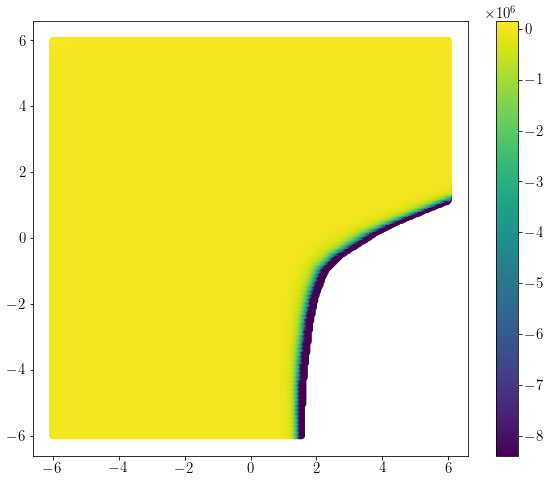

In [106]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - bce_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/bce_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

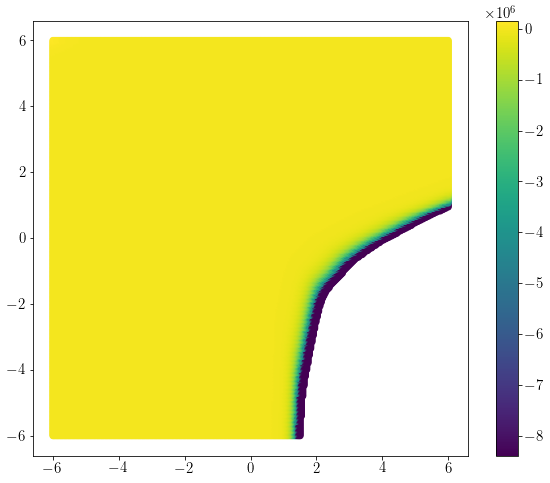

In [107]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mse_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mse_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

/clusterfs/ml4hep/shahzar/reweighting-schemes/utils/training.py:141: RuntimeWarning: overflow encountered in exp
  return np.squeeze(np.exp(f))


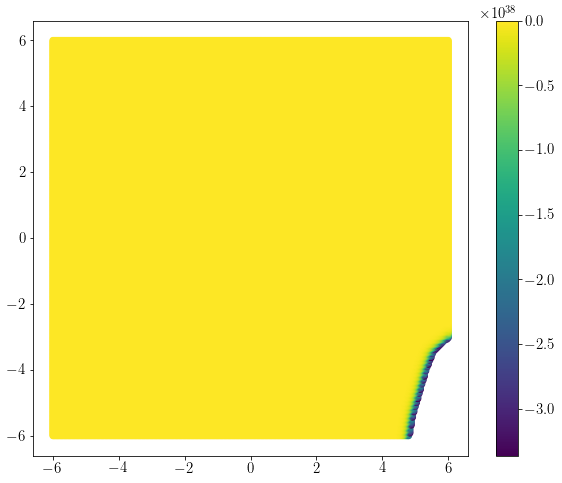

In [108]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - mlc_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/mlc_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')

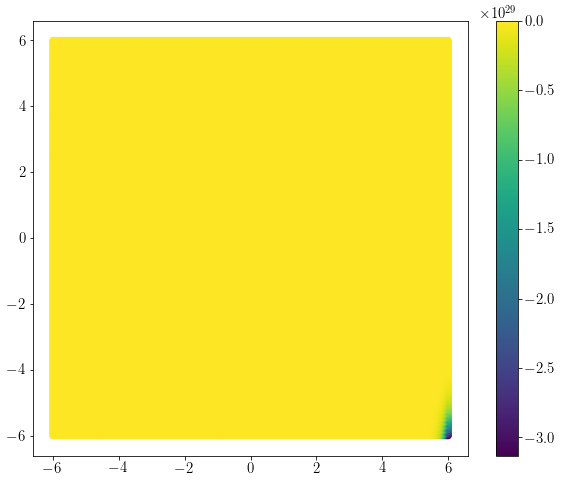

In [125]:
plt.figure(figsize = (10, 8))
diffs = lr(g) - sqr_lr(g)
plt.scatter(g[:, 0], g[:, 1], c = diffs)
plt.colorbar()
plt.gca().set_aspect('equal')

plt.savefig('plots/multivariate/scratch/set_{}/sqr_1.png'.format(num),
            dpi=1200, 
            bbox_inches='tight')